In [1]:
import pandas as pd

## Часть 1. EDA

1) Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
2) Посмотрите на базовые статистики датасета: средние, медианы и т.д.

In [3]:
data = pd.read_csv('breast_cancer_wisconsin_dataset/data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.info()
# data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data_diagnosis = data.iloc[:, [1]]
data_diagnosis.describe()

diagnosis
count        569
unique         2
top            B
freq         357

В данных есть наловый столбец Unnamed, а в diagnosis не числовые значения. Для работы с данным

In [7]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1}) # преобразуем в числовой тип
data = data.drop(columns=['id', 'Unnamed: 32']) # Удаляем незначащие столбцы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
# Выводим базовую статистику

columns_main = ['diagnosis']
columns_mean = [col for col in data.columns if "_mean" in col]
columns_se = [col for col in data.columns if "_se" in col]
columns_worst = [col for col in data.columns if "_worst" in col]

display(data[columns_main].describe())
print("Среднее значение")
display(data[columns_mean].describe())
print("Стандартная ошибка")
display(data[columns_se].describe())
print("Худшее значение")
display(data[columns_worst].describe())

diagnosis
count  569.000000
mean     0.372583
std      0.483918
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000

Среднее значение


radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  
count     569.000000              569.000000  
mean        0.181162                0.062798  
std         0.027414                0.007060  
min         0.106000                0.049960  
25%         0.161900                0.057700  
50%         0.179200                0.061540  
75%         0.195700                0.066120  
max         0.304000                0.097440

Стандартная ошибка


radius_se  texture_se  perimeter_se     area_se  smoothness_se  \
count  569.000000  569.000000    569.000000  569.000000     569.000000   
mean     0.405172    1.216853      2.866059   40.337079       0.007041   
std      0.277313    0.551648      2.021855   45.491006       0.003003   
min      0.111500    0.360200      0.757000    6.802000       0.001713   
25%      0.232400    0.833900      1.606000   17.850000       0.005169   
50%      0.324200    1.108000      2.287000   24.530000       0.006380   
75%      0.478900    1.474000      3.357000   45.190000       0.008146   
max      2.873000    4.885000     21.980000  542.200000       0.031130   

       compactness_se  concavity_se  concave points_se  symmetry_se  \
count      569.000000    569.000000         569.000000   569.000000   
mean         0.025478      0.031894           0.011796     0.020542   
std          0.017908      0.030186           0.006170     0.008266   
min          0.002252      0.000000           0.000000     0.007882   
25%          0.013080      0.015090           0.007638     0.015160   
50%          0.020450      0.025890           0.010930     0.018730   
75%          0.032450      0.042050           0.014710     0.023480   
max          0.135400      0.396000           0.052790     0.078950   

       fractal_dimension_se  
count            569.000000  
mean               0.003795  
std                0.002646  
min                0.000895  
25%                0.002248  
50%                0.003187  
75%                0.004558  
max                0.029840

Худшее значение


radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500

### 3) Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

In [11]:
import numpy as np
from sklearn import datasets
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def show_histograms(df: pd.DataFrame, hue):
    for column in df.columns:
        if column == hue:
            continue
        sns.histplot(df, x=column, hue=hue, element='step', kde=True)
        plt.title(f'Распределение of {column}')
        plt.show()

def show_pairplot_hist(df: pd.DataFrame, columns: list):
    sb.pairplot(df, kind="hist", vars=columns, 
                hue = columns_main[0])

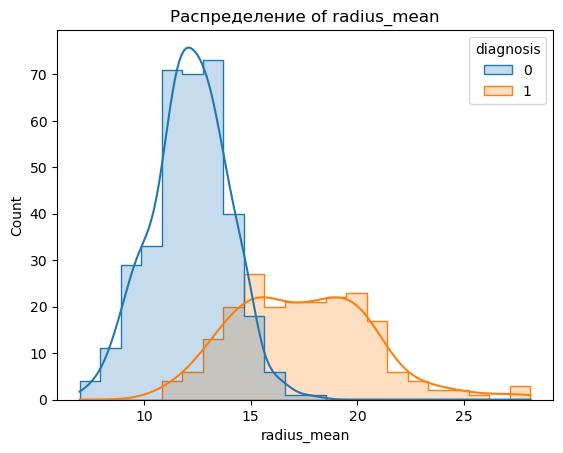

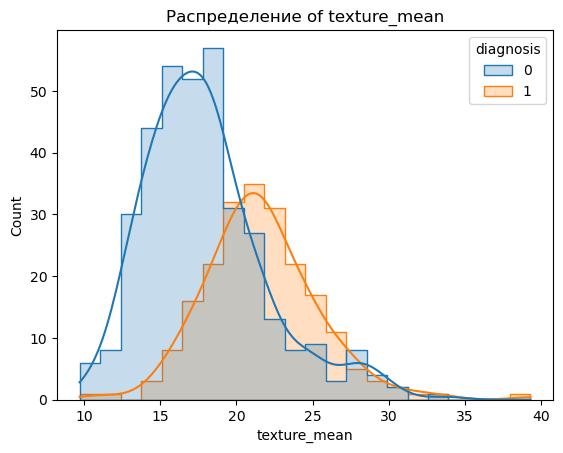

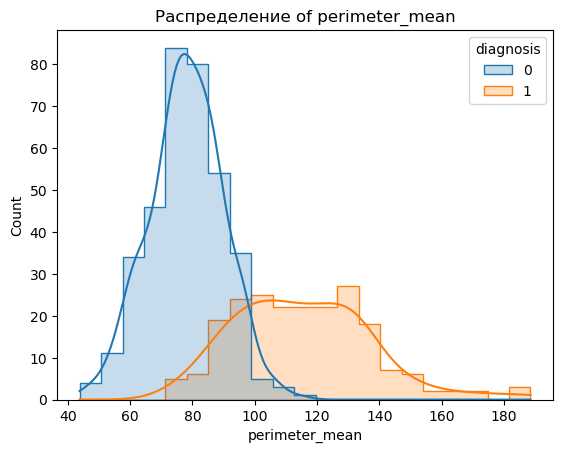

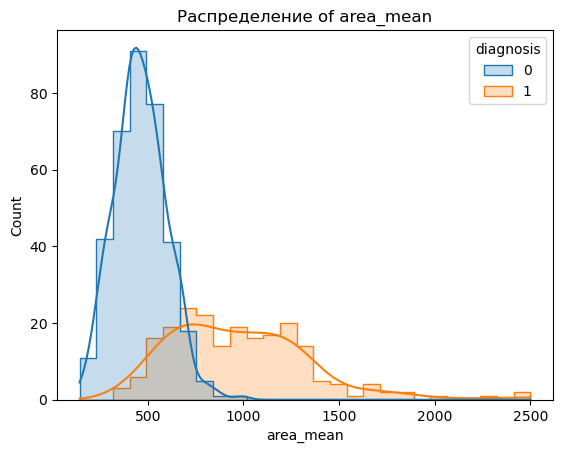

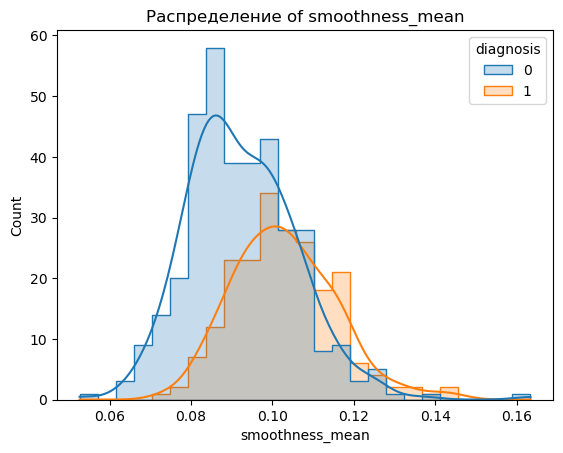

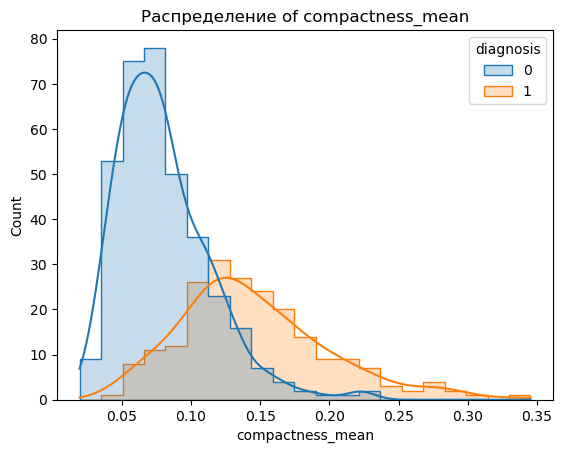

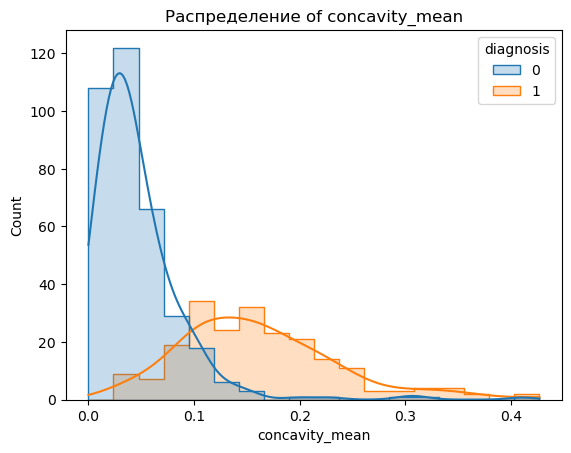

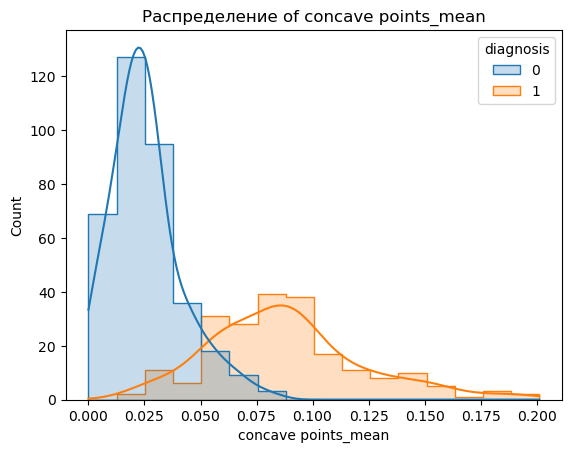

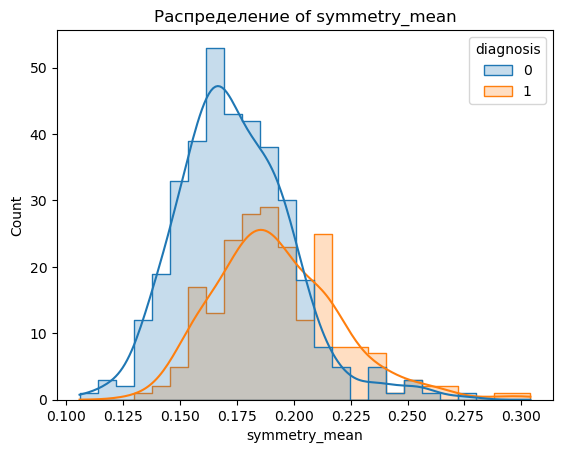

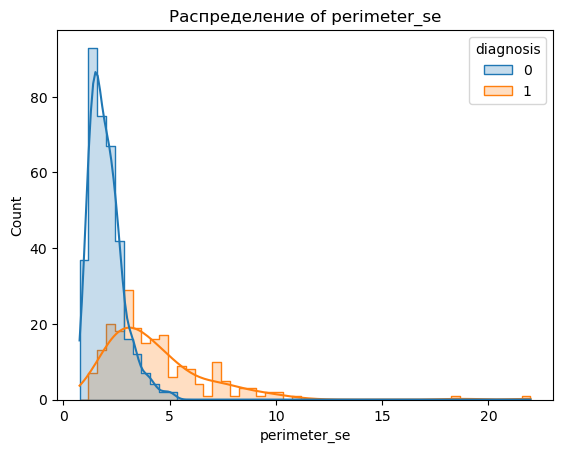

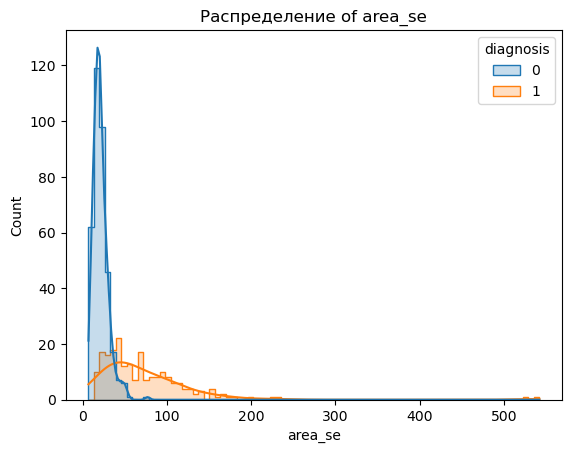

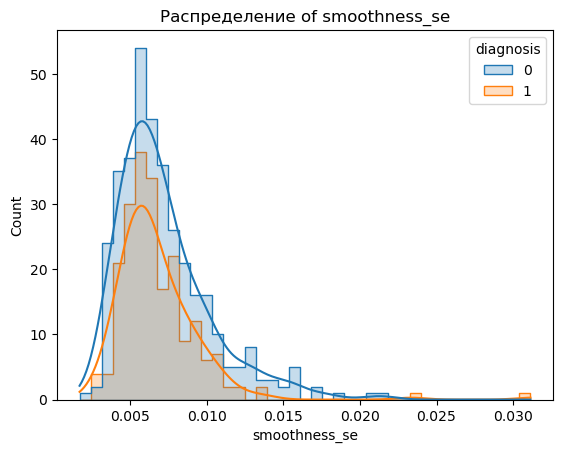

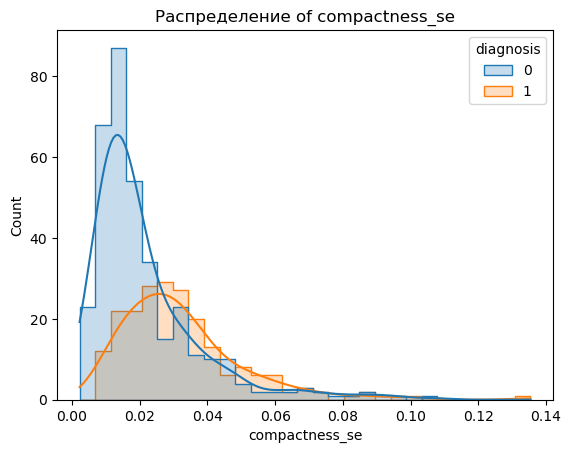

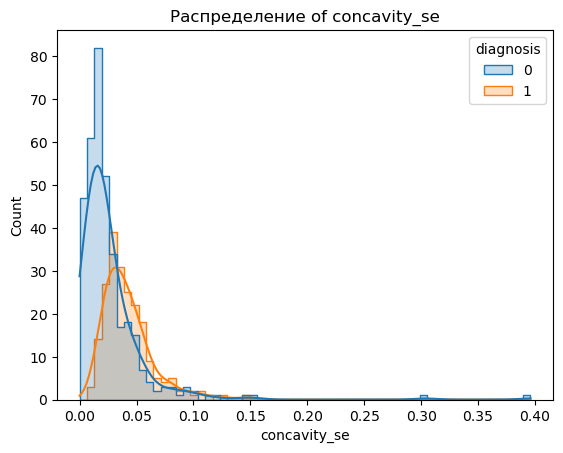

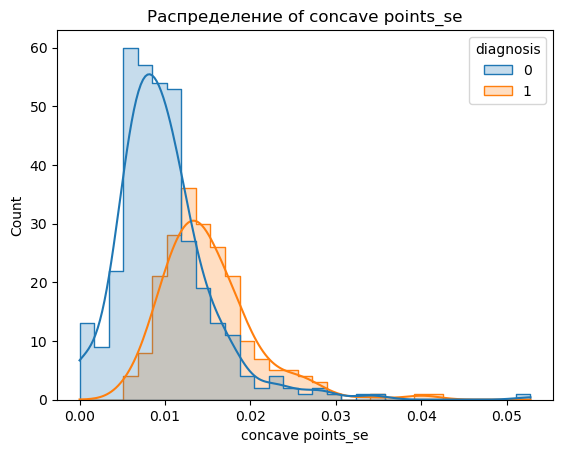

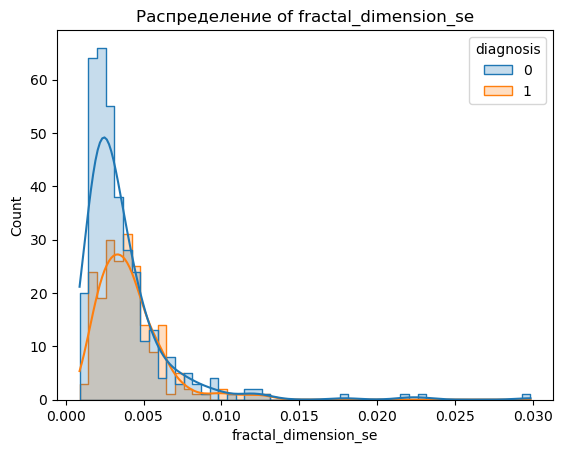

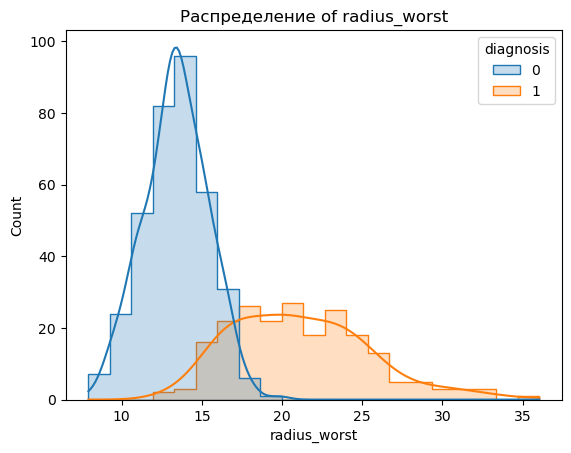

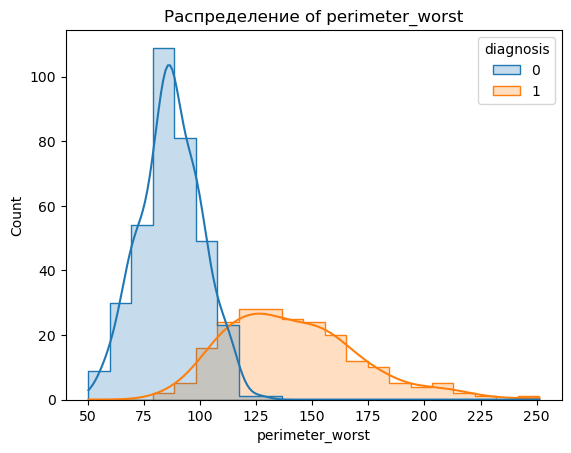

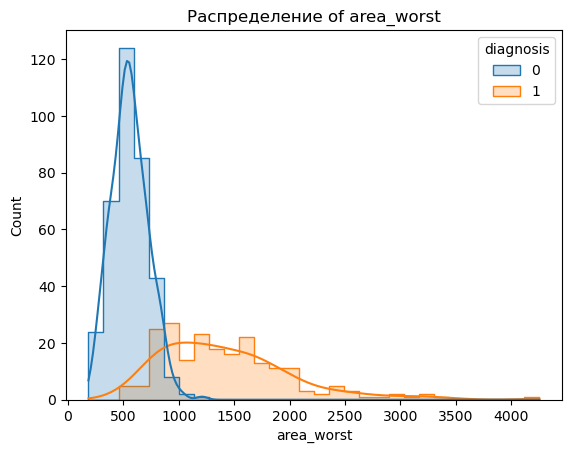

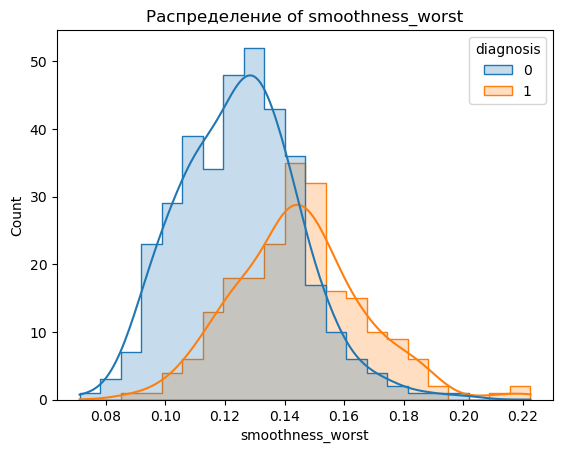

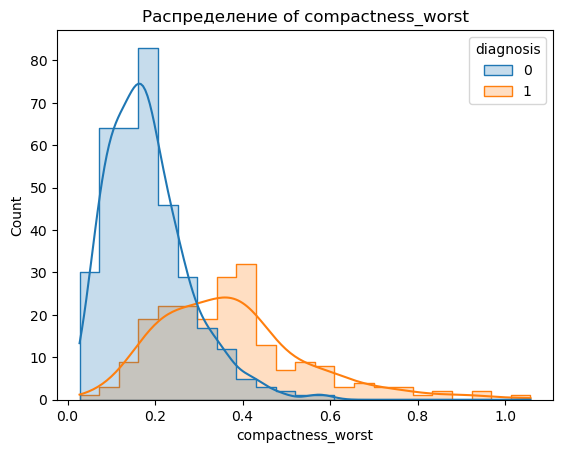

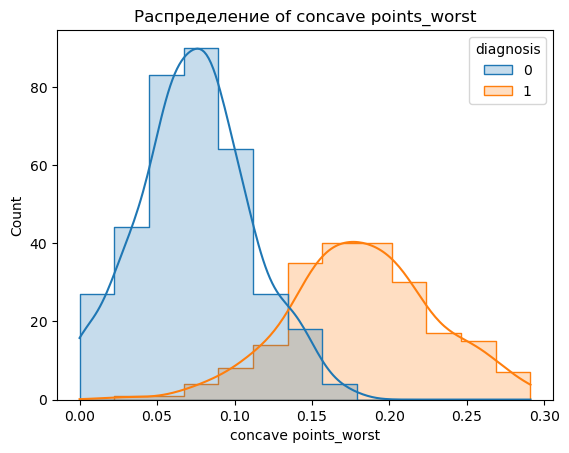

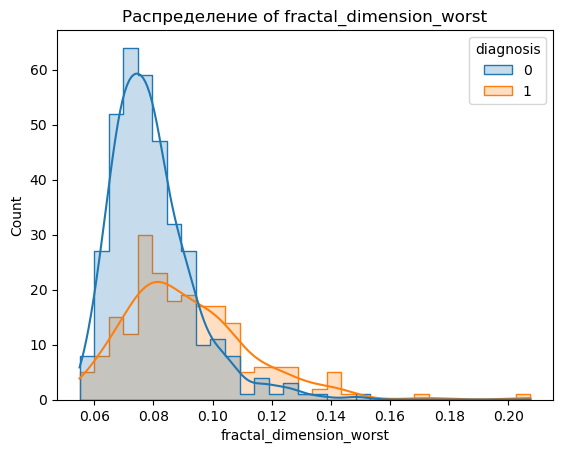

In [12]:
# Для визуализации отдельно
# data.hist(figsize=(20,20))
show_histograms(data[columns_main], columns_main[0])
show_histograms(data[columns_main + columns_mean], columns_main[0])
show_histograms(data[columns_main + columns_se], columns_main[0])
show_histograms(data[columns_main + columns_worst], columns_main[0])

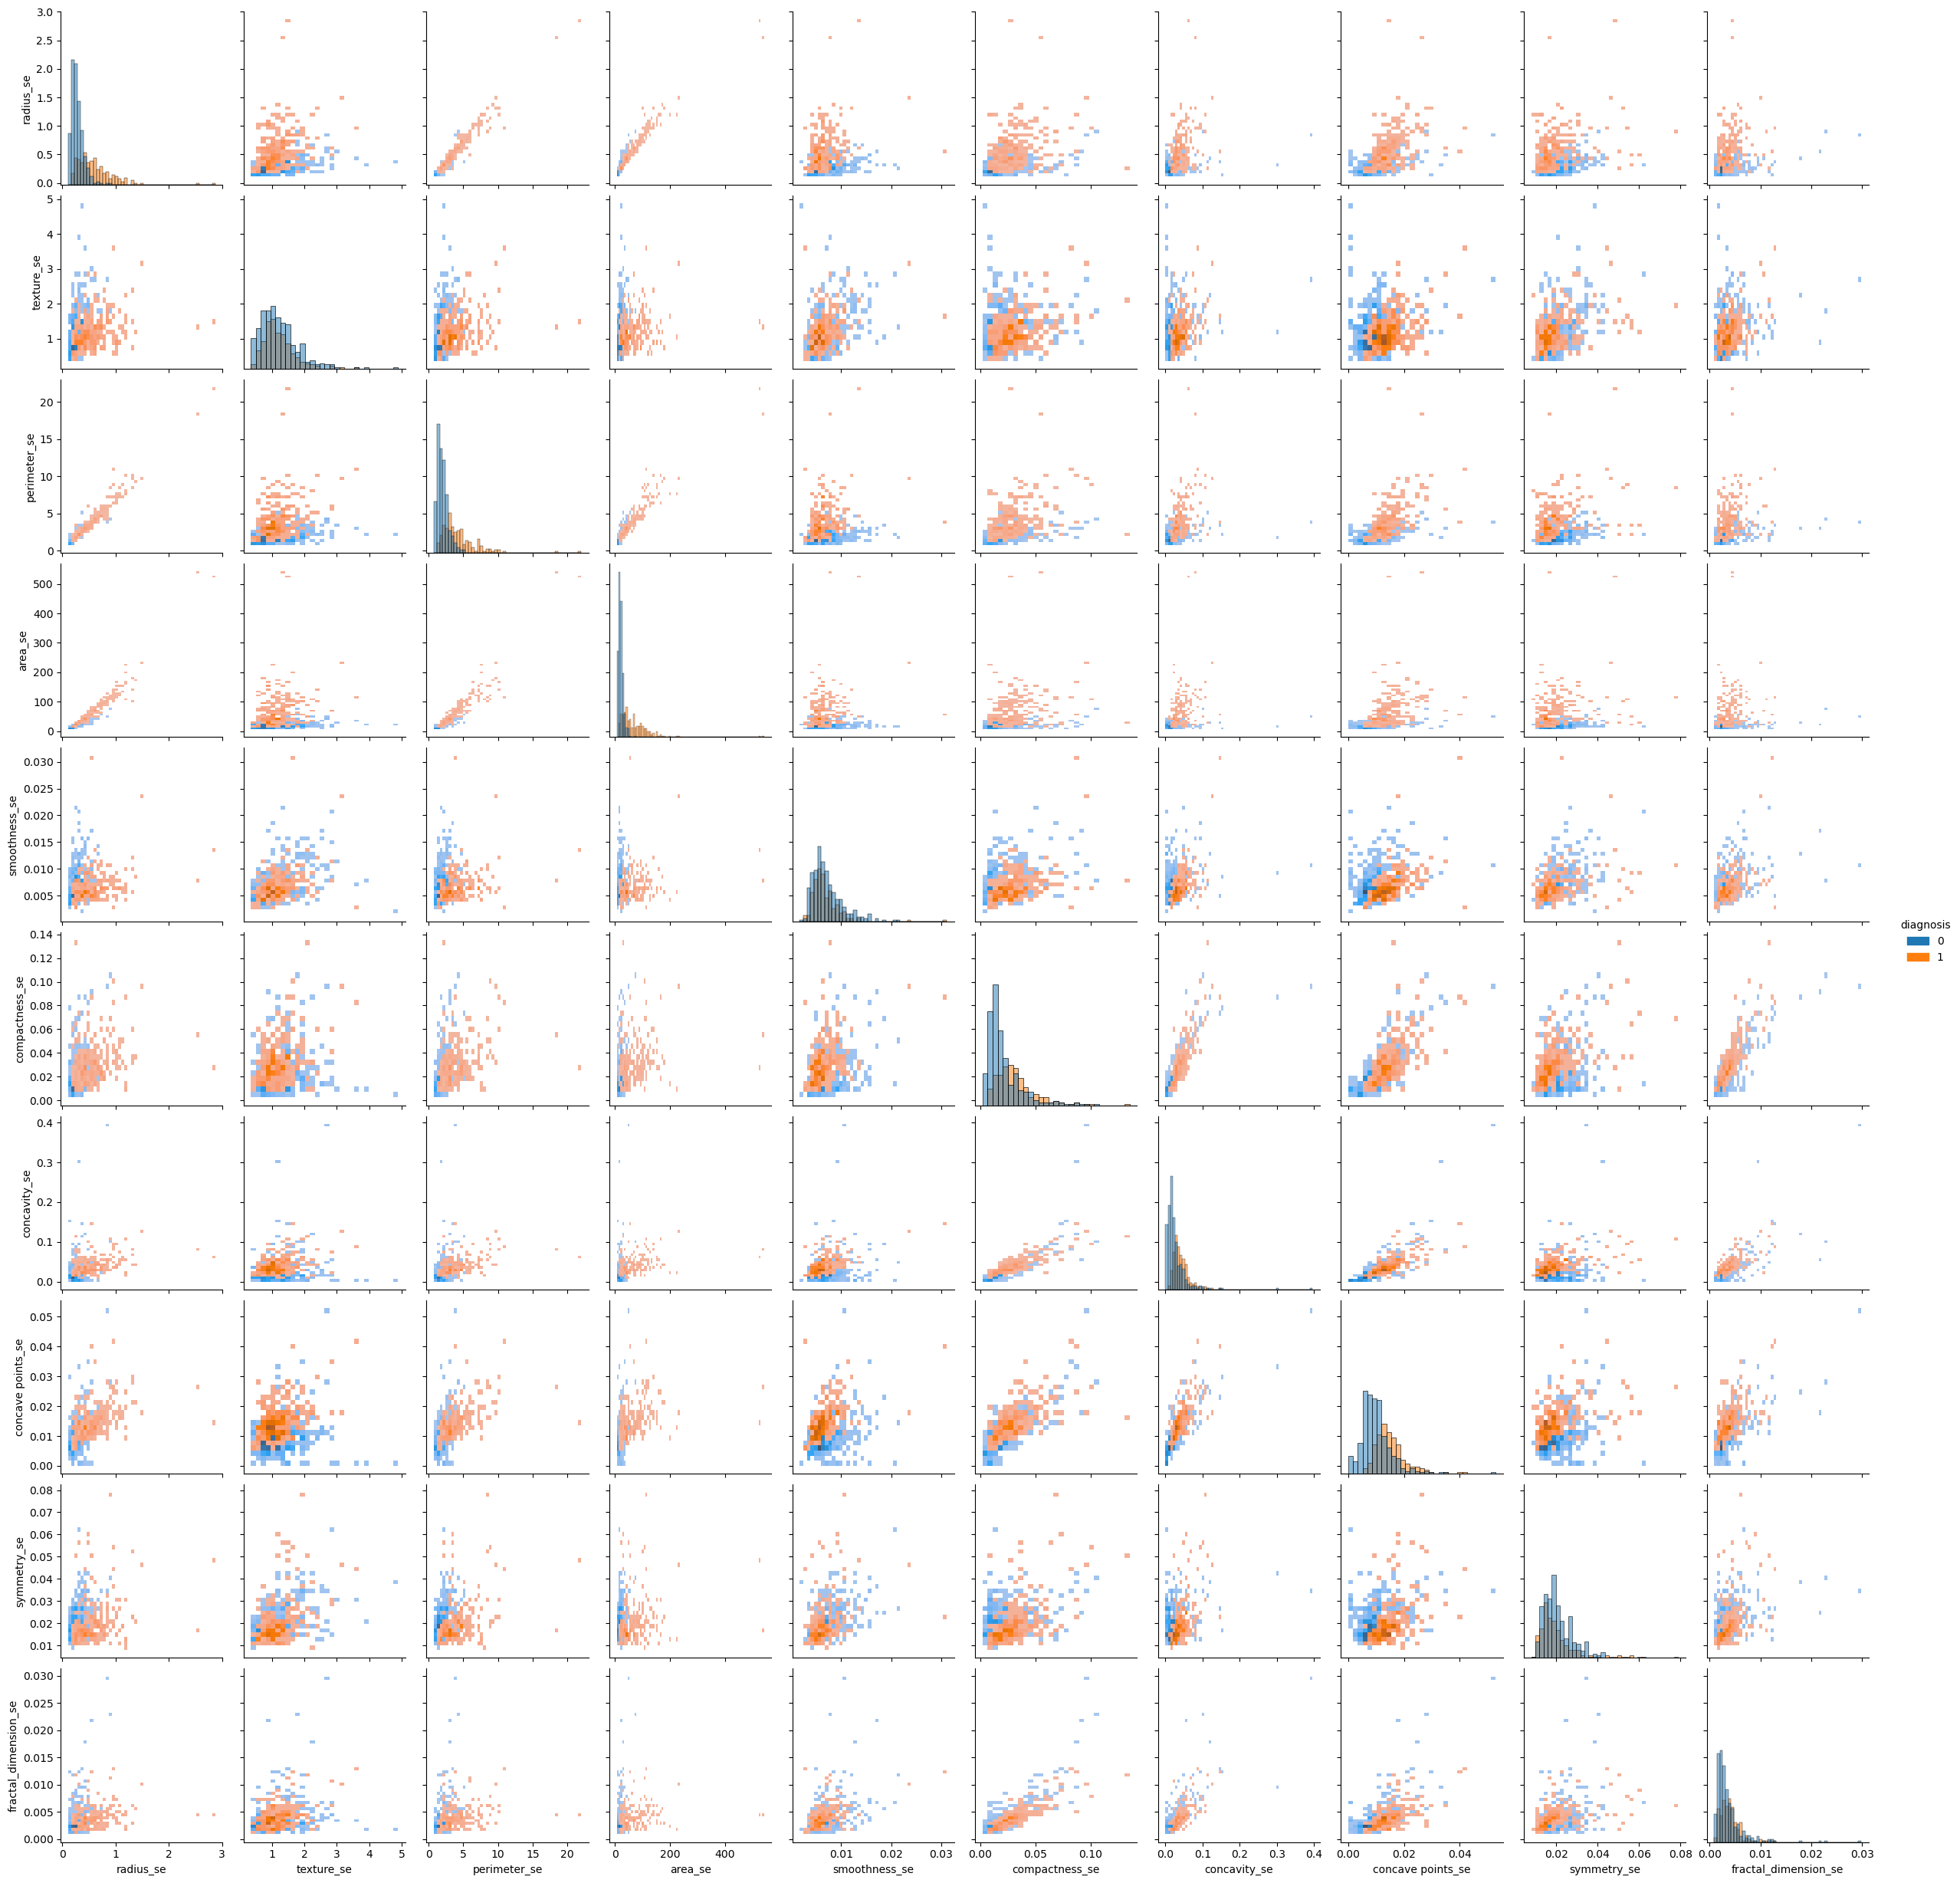

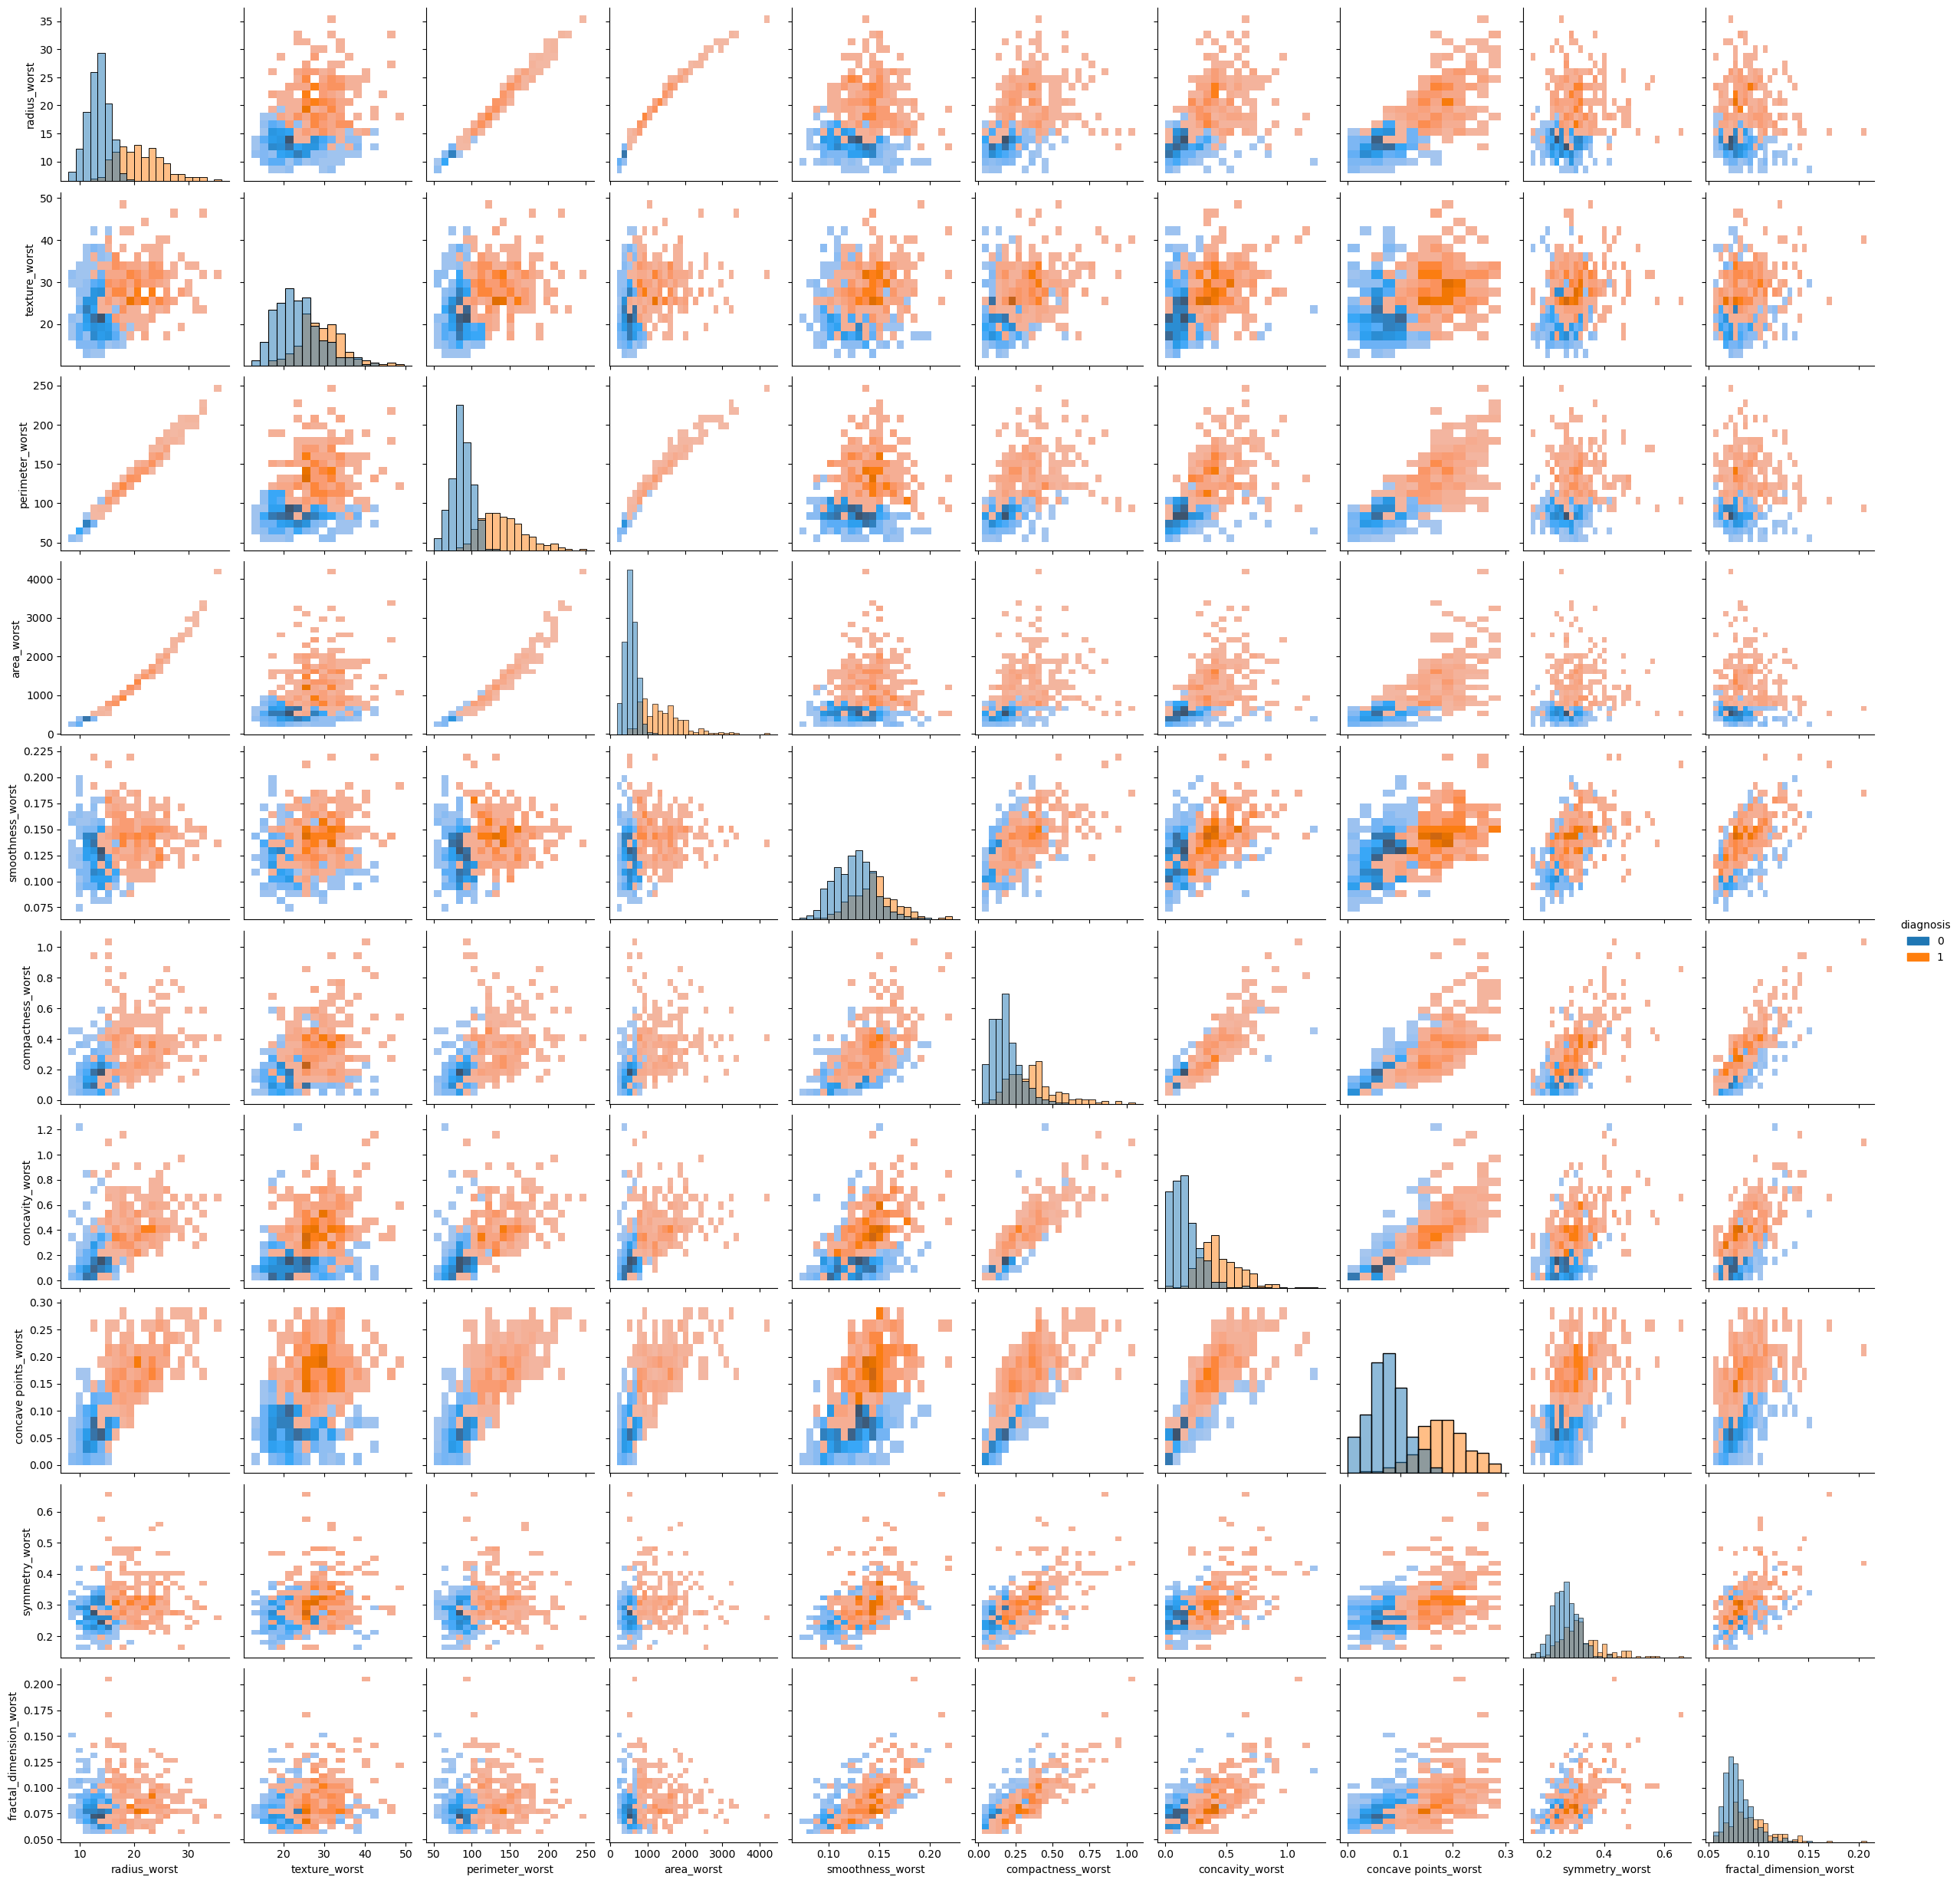

In [13]:
show_pairplot_hist(data, columns_mean)
show_pairplot_hist(data, columns_se)
show_pairplot_hist(data, columns_worst)

## 4) Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

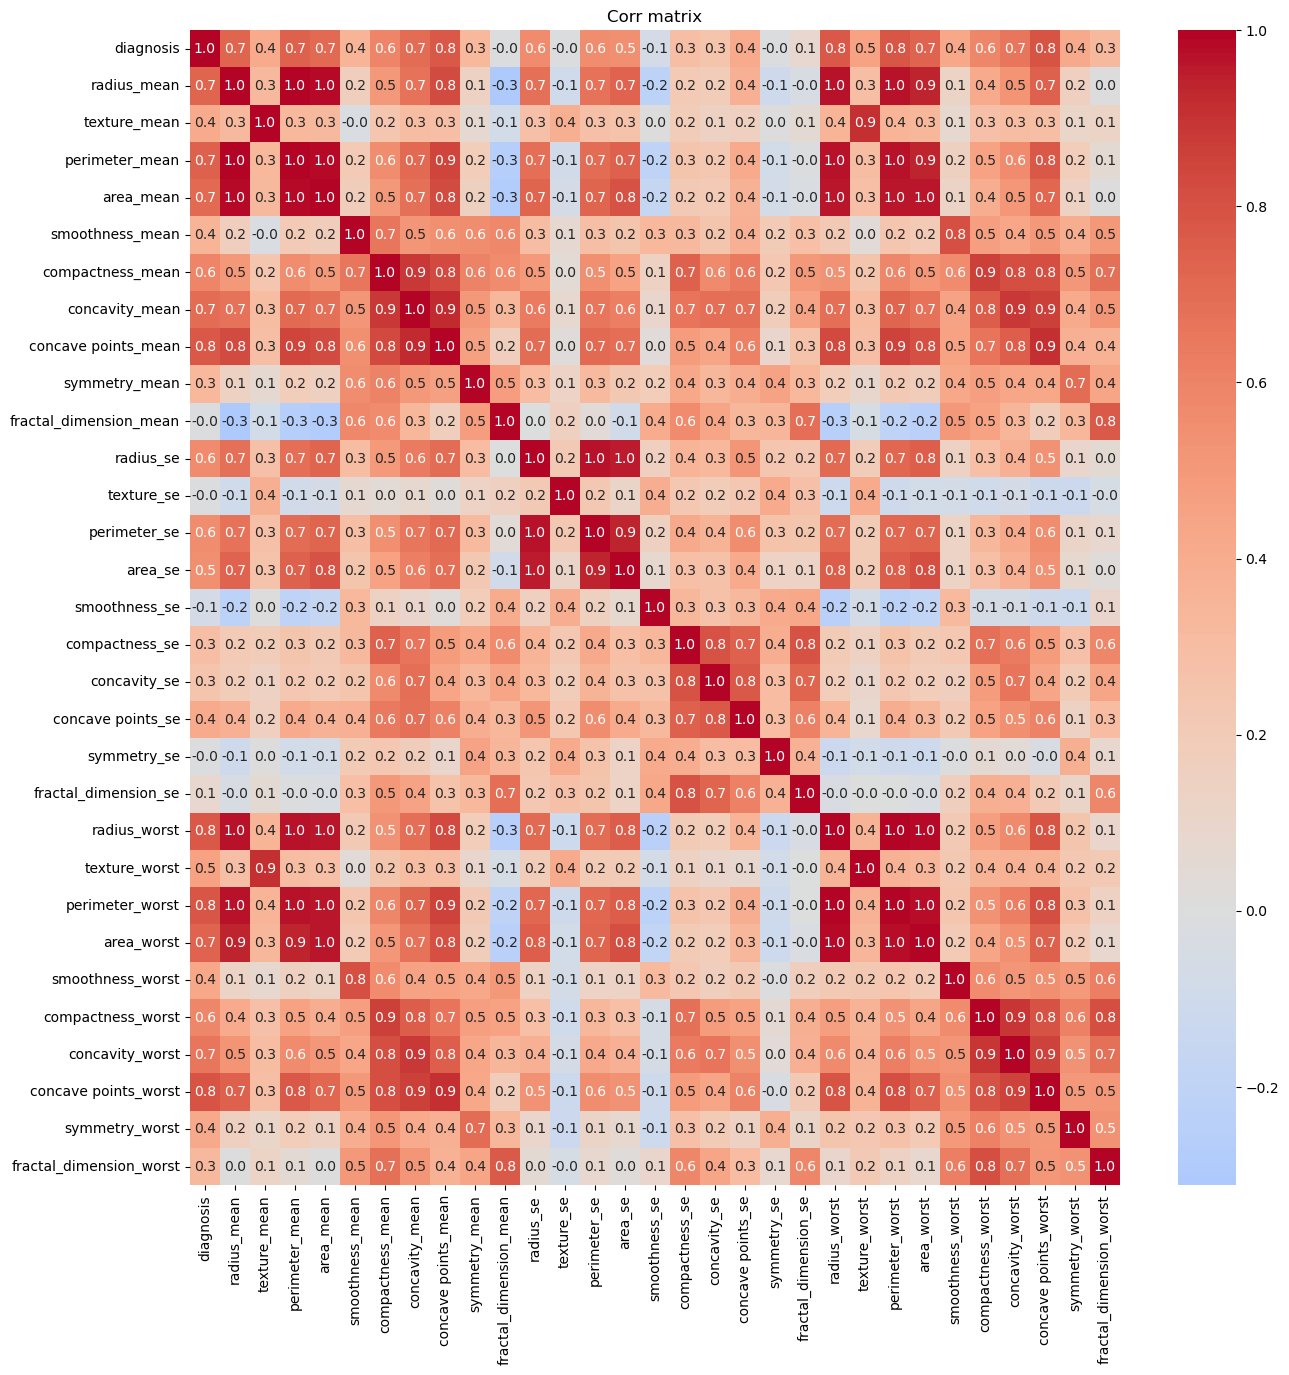

In [15]:
# Матрица корреляции
corr_matrix = data.corr()

plt.figure(figsize=(15, 15))
plt.title('Corr matrix')
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm', center = 0.0)
plt.show()

#### Отрицательная корреляция не прослеживается. Ищем только положительную. Как правило можно взять trashold для сильной корреляции 0.7, но в кореляционной матрице более явно прослеживаются признаки от 0.9

In [17]:
def find_correlated_columns(corrmatrix, threshold = 0.7, up_threshold = float('Inf')):
    result = []
    checked_cols = []
    most_correlated_cols = []
    for col in corrmatrix.columns:
        correlated_cols = corrmatrix[(abs(corrmatrix[col]) > threshold) & (abs(corrmatrix[col]) < up_threshold) & (corrmatrix[col].index != col)].index.tolist()
        
        if len(correlated_cols) == 0:
            continue

        checked_cols.append(col)
        for corr_col in correlated_cols:
            if corr_col not in checked_cols:
                most_correlated_cols.append(col)
                most_correlated_cols.append(corr_col)
                result.append((col, corr_col, corrmatrix[col][corr_col]))
    return result, set(most_correlated_cols)

corrs, most_corr_columns = find_correlated_columns(corr_matrix, 0.9)
print("Наиболее коррелируемые столбцы:\n", most_corr_columns, "\n")
print("Корреляции:")
for el in corrs:
    print(el)

Наиболее коррелируемые столбцы:
 {'area_mean', 'texture_worst', 'radius_worst', 'radius_se', 'area_worst', 'texture_mean', 'perimeter_worst', 'area_se', 'radius_mean', 'perimeter_se', 'concave points_worst', 'perimeter_mean', 'concavity_mean', 'concave points_mean'} 

Корреляции:
('radius_mean', 'perimeter_mean', 0.9978552814938109)
('radius_mean', 'area_mean', 0.9873571700566127)
('radius_mean', 'radius_worst', 0.9695389726112055)
('radius_mean', 'perimeter_worst', 0.9651365139559871)
('radius_mean', 'area_worst', 0.9410824595860461)
('texture_mean', 'texture_worst', 0.912044588840421)
('perimeter_mean', 'area_mean', 0.9865068039913907)
('perimeter_mean', 'radius_worst', 0.9694763634663146)
('perimeter_mean', 'perimeter_worst', 0.9703868870426394)
('perimeter_mean', 'area_worst', 0.9415498080023068)
('area_mean', 'radius_worst', 0.9627460860470841)
('area_mean', 'perimeter_worst', 0.9591195743552645)
('area_mean', 'area_worst', 0.9592133256498998)
('concavity_mean', 'concave points_me

## 5) Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

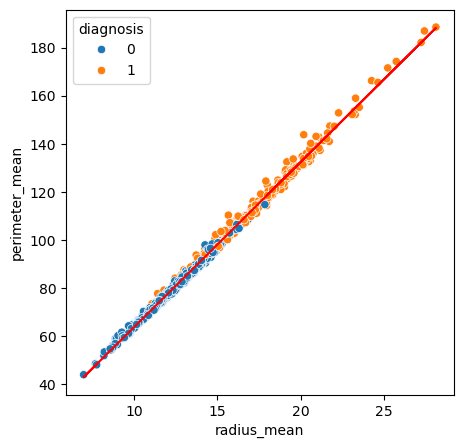

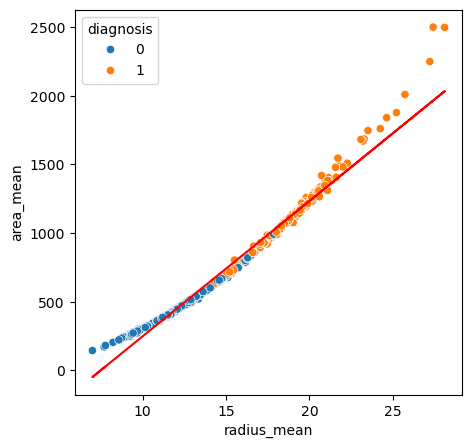

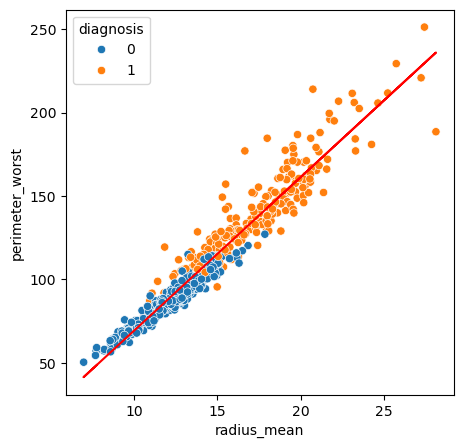

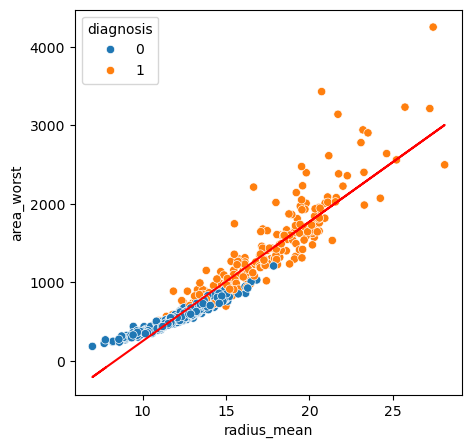

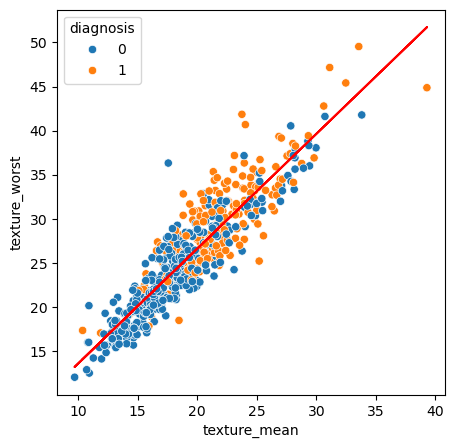

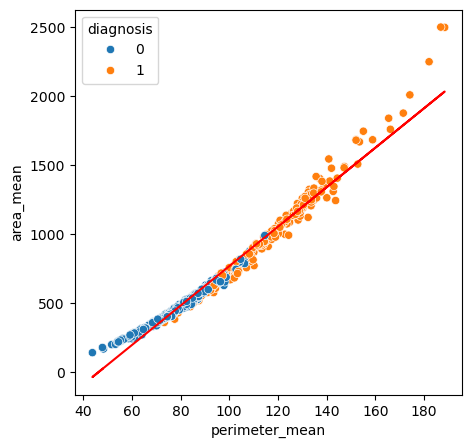

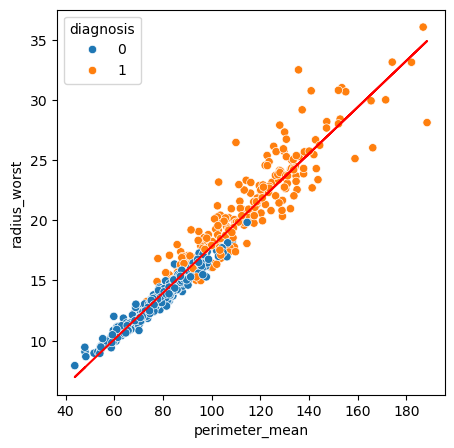

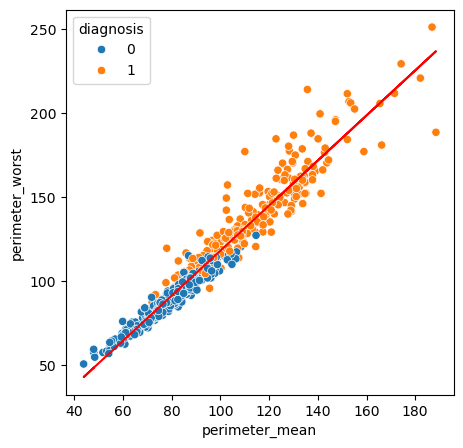

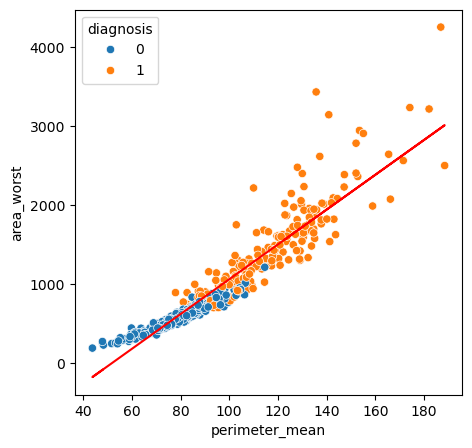

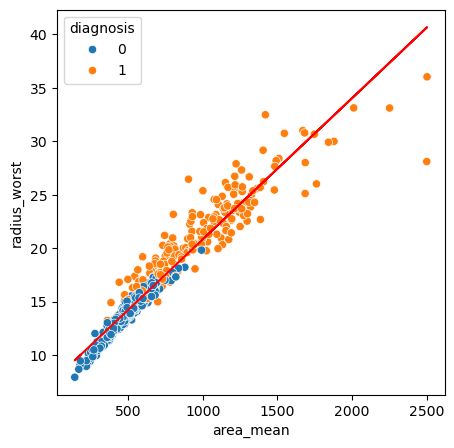

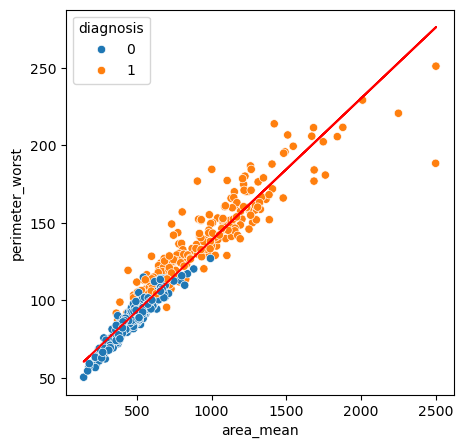

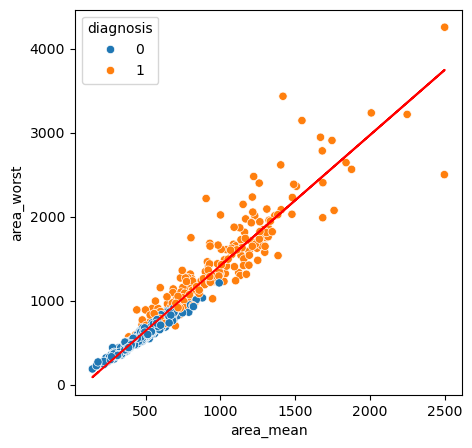

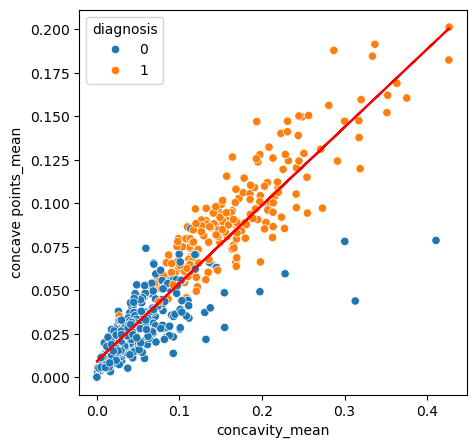

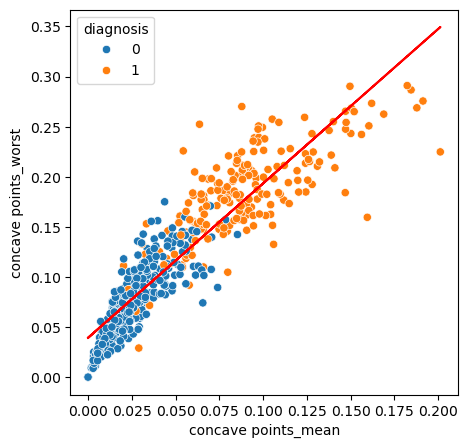

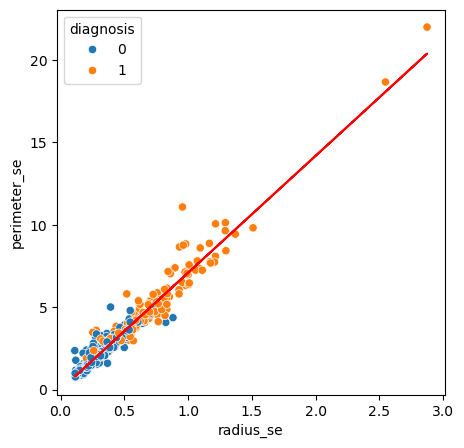

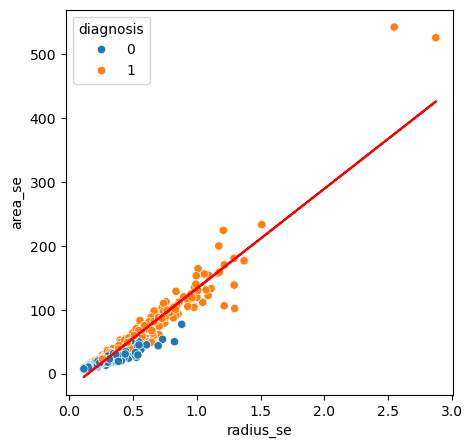

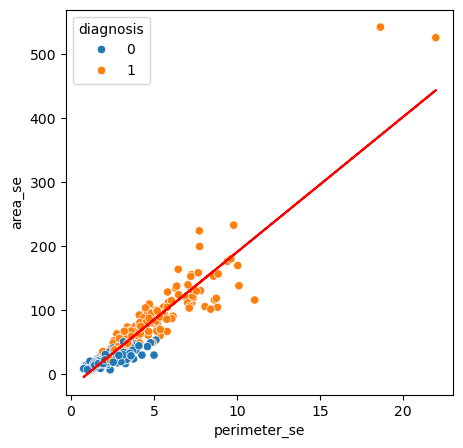

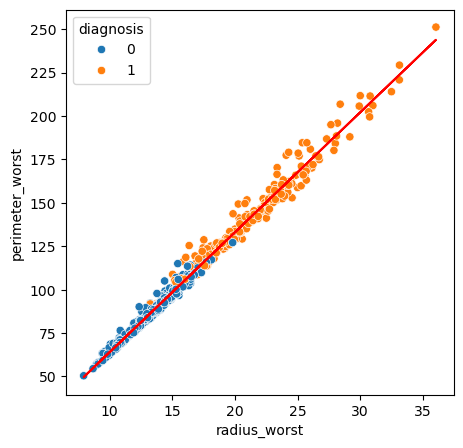

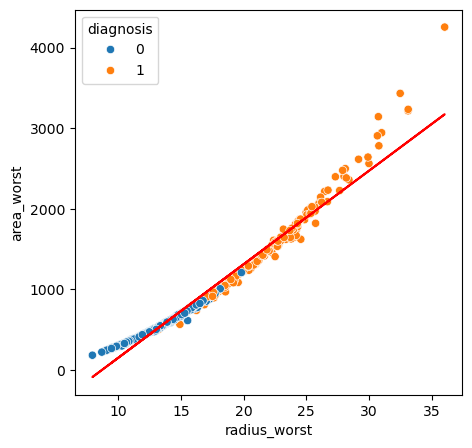

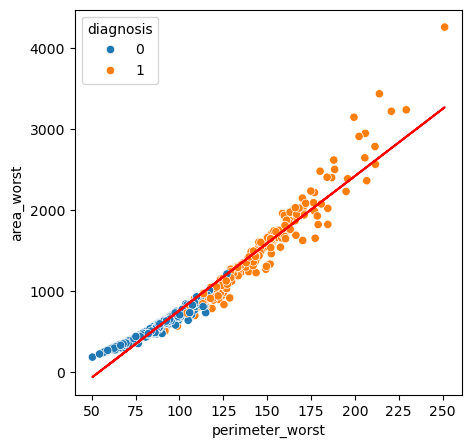

In [19]:
for label_1, label2, _ in corrs:
    plt.figure(figsize=(5, 5))
    # Сначала рисуем обычный scatterplot
    sns.scatterplot(x=label_1, y=label2, data=data, hue='diagnosis')
    # Вычисляем коэффициенты линейной регрессии
    slope, intercept = np.polyfit(data[label_1], data[label2], deg=1)
    # Строим прямую линия регрессии
    plt.plot(data[label_1], slope * data[label_1] + intercept, color="red")
    plt.show()

Т.к. radius, area, perimetr связаны геометрически, линейная зависимость между ними закономерна. 'texture_mean', 'texture_worst' зависимы. Интересны зависимости Сoncave points и concavity.  'concavity_mean', 'concave points_mean' явно зависимы и 'concave points_mean', 'concave points_worst'. Т.е. 'concavity_mean' и 'concave points_worst' тоже. Если mean и wrost зависимы в обещм случае, то можно предположить следующее:

- Для найденных показателей высокая корреляция между среднем показателем mean и худшим проявлением wrost свидетельствует о значительной зависимости между ними. Это может означать, что ухудшение состояния характеристики В часто связано с ухудшением характеристик А. 

- Высокая корреляция может возникать из-за наличия значимых выбросов или редких ситуаций, которые одновременно влияют на оба признака. Такие события могли привести к росту среднего значения А и увеличению максимальных негативных проявлений В.

- Возможно, существует общий фактор, влияющий на обе зависимые переменные. Например, внешние условия или внутренние процессы, оказывающие воздействие на среднюю величину А и максимальное негативное проявление В.

- Иногда данные могут быть искусственно разделены на категории или уровни, что усиливает корреляционную связь. Например, разделение пациентов на группы по диагнозам могло бы создать иллюзию высокого влияния одних признаков на другие.

## 6) Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

Выберем корреляцию по 0.8

In [23]:
corrs, most_corr_columns = find_correlated_columns(corr_matrix, 0.8)
print(f"Наиболее коррелируемые столбцы ({len(most_corr_columns)}):\n{most_corr_columns}\n")
print("Корреляции:")
for el in corrs:
    print(el)

Наиболее коррелируемые столбцы (23):
{'radius_worst', 'concavity_worst', 'concavity_se', 'perimeter_worst', 'concave points_mean', 'texture_worst', 'concavity_mean', 'smoothness_worst', 'area_mean', 'fractal_dimension_worst', 'radius_se', 'texture_mean', 'compactness_se', 'area_se', 'radius_mean', 'fractal_dimension_se', 'smoothness_mean', 'compactness_mean', 'area_worst', 'perimeter_se', 'concave points_worst', 'perimeter_mean', 'compactness_worst'}

Корреляции:
('radius_mean', 'perimeter_mean', 0.9978552814938109)
('radius_mean', 'area_mean', 0.9873571700566127)
('radius_mean', 'concave points_mean', 0.8225285223871786)
('radius_mean', 'radius_worst', 0.9695389726112055)
('radius_mean', 'perimeter_worst', 0.9651365139559871)
('radius_mean', 'area_worst', 0.9410824595860461)
('texture_mean', 'texture_worst', 0.912044588840421)
('perimeter_mean', 'area_mean', 0.9865068039913907)
('perimeter_mean', 'concave points_mean', 0.8509770412528191)
('perimeter_mean', 'radius_worst', 0.969476363

In [24]:
# Исключим area, perimetr, оставим radius
excluded = ['area_mean', 'perimeter_mean', 'area_se', 'perimeter_se', 'area_worst', 'perimeter_worst']

interesting_columns = [e for e in most_corr_columns if e not in excluded]
interesting_columns = sorted(interesting_columns)
print(interesting_columns)

['compactness_mean', 'compactness_se', 'compactness_worst', 'concave points_mean', 'concave points_worst', 'concavity_mean', 'concavity_se', 'concavity_worst', 'fractal_dimension_se', 'fractal_dimension_worst', 'radius_mean', 'radius_se', 'radius_worst', 'smoothness_mean', 'smoothness_worst', 'texture_mean', 'texture_worst']


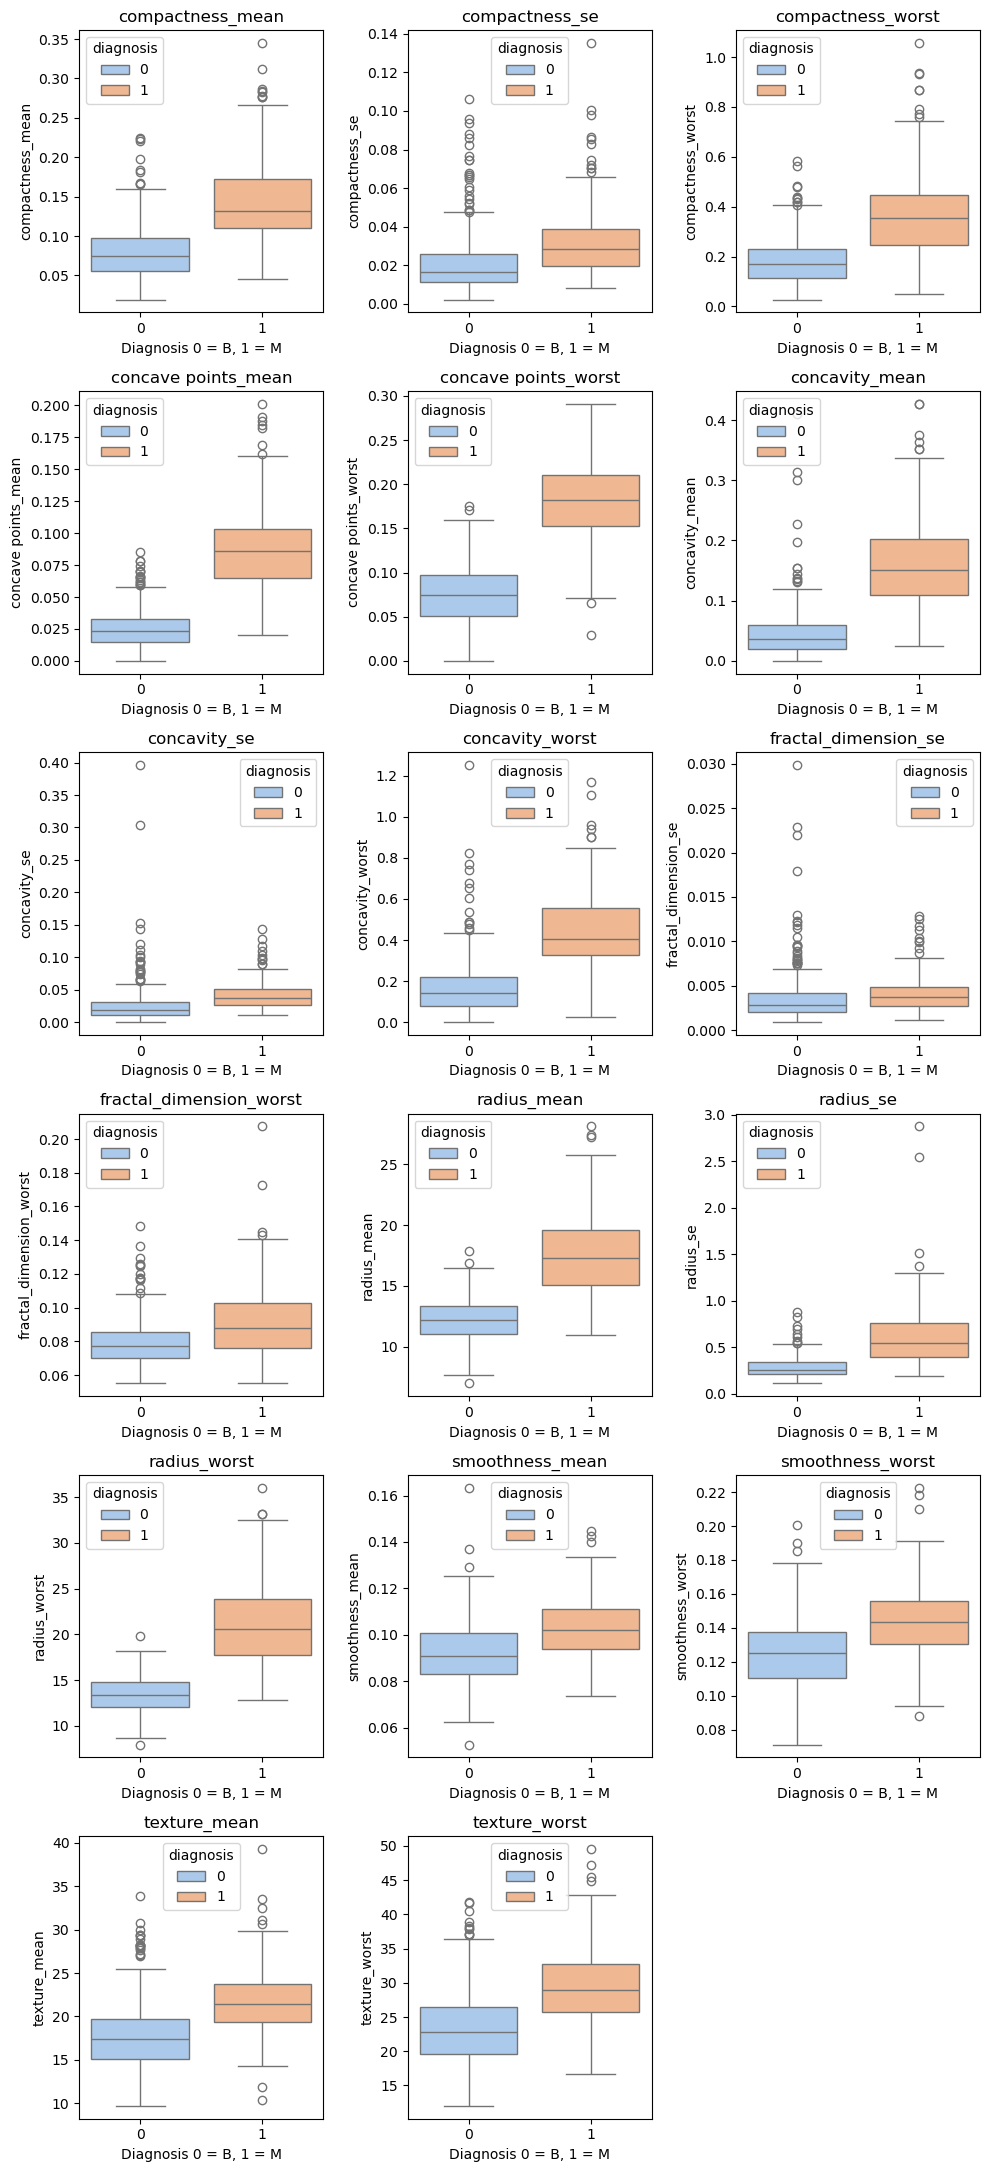

In [25]:
columns_num = len(interesting_columns)

plt.figure(figsize=(10, 25))

for index, column in enumerate(interesting_columns):
    plt.subplot(7, 3, index+1)
    sns.boxplot(x='diagnosis', y=column, data=data, hue='diagnosis', palette='pastel')
    plt.title(column)
    plt.xlabel('Diagnosis 0 = B, 1 = M')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### Вывод: radius compactness concave concavity concave_points являются наиболее информативными для определения злокачественности опухоли

# Часть 2. Моделирование при помощи kNN

## 1. Разделение данных на train-test, откладываем 30% выборки для тестирования

In [29]:
from sklearn.model_selection import train_test_split

features_columns = ['radius_mean', 'concavity_mean', 'compactness_mean', 'concave points_mean']

X = data[features_columns]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39, stratify=y)

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 398
Размер тестовой выборки: 171


## 2) Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(X_train_scaled.head())

   radius_mean  concavity_mean  compactness_mean  concave points_mean
0     1.780945        0.801976          0.029675             0.836033
1     0.327513        0.959406          1.198533             0.937709
2    -0.517765       -1.094511         -1.347814            -1.227179
3    -0.230426       -0.686412         -0.789651            -0.627512
4    -0.646091       -0.807353         -0.941809            -0.842986


Стандартизация приводит все непрерывные переменные к одному масштабу с средним 0 и стандартным отклонением 1. Это важно, чтобы модели не отдавали предпочтение переменным с большими значениями и чтобы алгоритмы, чувствительные к масштабу, работали лучше. Стандартизация помогает уменьшить влияние выбросов на модель.

### 3) Постройте модель kNN «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.


kNN 'из коробки':
Accuracy: 0.8771929824561403
Precision: 0.8115942028985508
Recall: 0.875
F1-score: 0.8421052631578947
ROC AUC: 0.9425379672897197


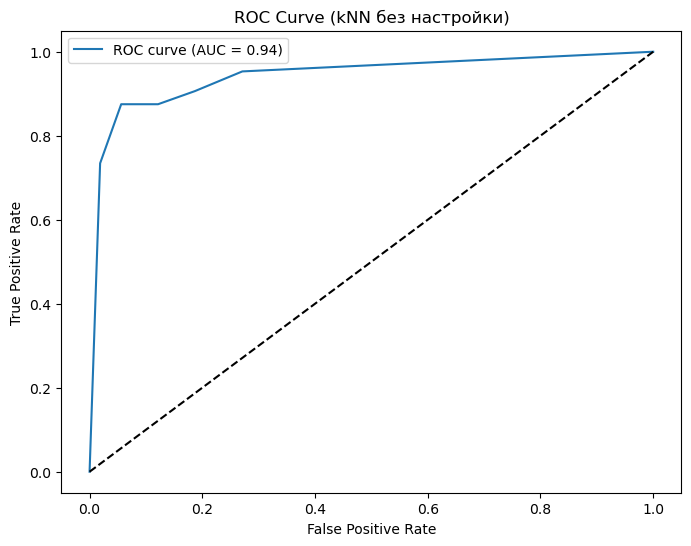

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]  # Вероятности для ROC-AUC

# Оценка качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nkNN 'из коробки':")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (kNN без настройки)')
plt.legend()
plt.show()

## 5) Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :(

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# 2. Настройка параметра числа соседей на кросс-валидации
param_grid = {'n_neighbors': range(1, 21)}  # Подбор от 1 до 20 соседей
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc') # Используем ROC-AUC для кросс-валидации
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"\nЛучшее количество соседей (по кросс-валидации): {best_n_neighbors}")

# Обучение модели с лучшими параметрами
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)
y_pred_proba_best = knn_best.predict_proba(X_test_scaled)[:, 1] # Вероятности

# Оценка качества модели с лучшими параметрами
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

print("\nkNN с настройкой параметров (кросс-валидация):")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-score: {f1_best}")
print(f"ROC AUC: {roc_auc_best}")

# ROC-кривая для модели с лучшими параметрами
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label=f'ROC curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (kNN с настройкой)')
plt.legend()
plt.show()


# Сравнение результатов
print("\nСравнение результатов:")
print(f"Accuracy (без настройки): {accuracy:.4f}, Accuracy (с настройкой): {accuracy_best:.4f}")
print(f"ROC AUC (без настройки): {roc_auc:.4f}, ROC AUC (с настройкой): {roc_auc_best:.4f}")


Лучшее количество соседей (по кросс-валидации): 13

kNN с настройкой параметров (кросс-валидация):
Accuracy: 0.8947368421052632
Precision: 0.859375
Recall: 0.859375
F1-score: 0.859375
ROC AUC: 0.9572867990654206



Сравнение результатов:
Accuracy (без настройки): 0.8772, Accuracy (с настройкой): 0.8947
ROC AUC (без настройки): 0.9425, ROC AUC (с настройкой): 0.9573
